<div align="center">  <img src="https://matplotlib.org/_static/logo2.png" width="1000"/> </div><br>

>用 Matplotlib 画图时中文无法显示，遂解决之

本方法只适用于 Linux 环境

Matplotlib 无法显示中文这个问题由来已久，官方一直没有解决，只能自己解决啦。

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#安装中文字体" data-toc-modified-id="安装中文字体-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>安装中文字体</a></span></li><li><span><a href="#将字体文件拷贝到-Matplolib-字体文件夹" data-toc-modified-id="将字体文件拷贝到-Matplolib-字体文件夹-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>将字体文件拷贝到 Matplolib 字体文件夹</a></span><ul class="toc-item"><li><span><a href="#可选操作" data-toc-modified-id="可选操作-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>可选操作</a></span></li></ul></li><li><span><a href="#方案1-通过-rc.Params-指定字体" data-toc-modified-id="方案1-通过-rc.Params-指定字体-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>方案1-通过 <code>rc.Params</code> 指定字体</a></span></li><li><span><a href="#方案2-通过路径指定字体" data-toc-modified-id="方案2-通过路径指定字体-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>方案2-通过路径指定字体</a></span></li><li><span><a href="#总结" data-toc-modified-id="总结-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>总结</a></span></li><li><span><a href="#可能需要的操作" data-toc-modified-id="可能需要的操作-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>可能需要的操作</a></span></li></ul></div>

## 安装中文字体

可以从这个 repo 安装

```shell
git clone https://github.com/tracyone/program_font 
cd program_font 
./install.sh
```
安装完字体之后 `/usr/share/fonts` 目录下会多出很多字体。这只是给 Ubuntu 系统安装了字体，但 Matplotlib 还是不能使用这些字体，需要将字体文件拷贝到 Matplolib 字体文件夹

## 将字体文件拷贝到 Matplolib 字体文件夹

检测　Matplotlib 字体文件夹

In [1]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/nwpu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

Matplotlib 的字体文件夹应该在同级目录，即　`/home/nwpu/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts`

从　`/usr/share/fonts` 中找一个中文字体的 ttf 文件拷贝到　`/home/nwpu/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts` 文件夹

### 可选操作

删除当前用户matplotlib 的缓存文件（如果没有直接进入第四步）

```shell
$cd ~/.cache/matplotlib
$rm -rf *.*
```

通过以下脚本检测 Ubuntu 和 Matplotlib 都可用的字体

In [2]:
from matplotlib.font_manager import FontManager
import subprocess
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
#print(mat_fonts)
output = subprocess.check_output(
    'fc-list :lang=zh -f "%{family}\n"', shell=True) # 获取字体列表
output = output.decode('utf-8')
#print(output)

zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
available = mat_fonts & zh_fonts
print('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print(f)

********** 可用的字体 **********
Yahei Mono
YaHei Consolas Hybrid
Droid Sans Fallback


## 方案1-通过 `rc.Params` 指定字体

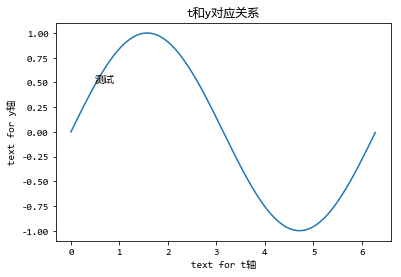

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

font_name = "YaHei Consolas Hybrid"
mpl.rcParams['font.family']= font_name # 指定字体，实际上相当于修改 matplotlibrc 文件　只不过这样做是暂时的　下次失效
mpl.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框

t = np.linspace(0, 2*np.pi, 1000, endpoint=False)
y = np.sin(t)
fig, ax = plt.subplots()

ax.set_xlabel(u"text for t轴")
ax.set_ylabel(u"text for y轴")
ax.set_title(u"t和y对应关系")
ax.plot(t,y)
plt.savefig("data/save.png", bbox_inches='tight', dpi = 1000)


plt.text(0.5, 0.5, s=u'测试')
plt.show()

以上操作**暂时更改** Matplotlib 的字体选项，只在本 kernel 中有效

若想**永久更改** Matplotlib 所使用的字体，可以直接修改`matplotlibrc`文件，路径为 `matplotlib.matplotlib_fname()` 的返回值即 `/home/nwpu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc`

具体修改以下几项

```
font.family         : sans-serif        
font.sans-serif     : SimHei, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif # 在其中添加中文字体名
axes.unicode_minus  :False，#作用就是解决负号'-'显示为方块的问题
```

## 方案2-通过路径指定字体

通过路径指定字体可以指定系统内任意字体，而不需要是 matplotlib 字体文件夹内的字体

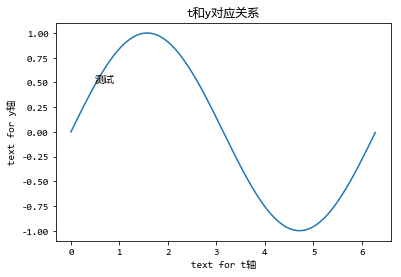

In [4]:
import matplotlib.font_manager as mfm

font_path = "/usr/share/fonts/MyFonts/YaHei.Consolas.1.11b.ttf"
prop = mfm.FontProperties(fname=font_path)

t = np.linspace(0, 2*np.pi, 1000, endpoint=False)
y = np.sin(t)
fig, ax = plt.subplots()

ax.set_xlabel(u"text for t轴")
ax.set_ylabel(u"text for y轴")
ax.set_title(u"t和y对应关系")
ax.plot(t,y)
plt.savefig("data/save.png", bbox_inches='tight', dpi = 1000)


plt.text(0.5, 0.5, s=u'测试')
plt.show()

## 总结

1. 为 Ubuntu 系统安装中文字体
2. 将中文字体拷贝到 Matplotlib 字体文件夹
3. 在代码中指定一个可用的字体

## 可能需要的操作

```py
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下
```

References：
> - [A Gentle Guide on How to Use Chinese Characters With Matplotlib](https://jdhao.github.io/2017/05/13/guide-on-how-to-use-chinese-with-matplotlib/)